In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
simulation_dir = os.path.join(parent_dir, "optimize_rl")

sys.path.insert(0, simulation_dir)

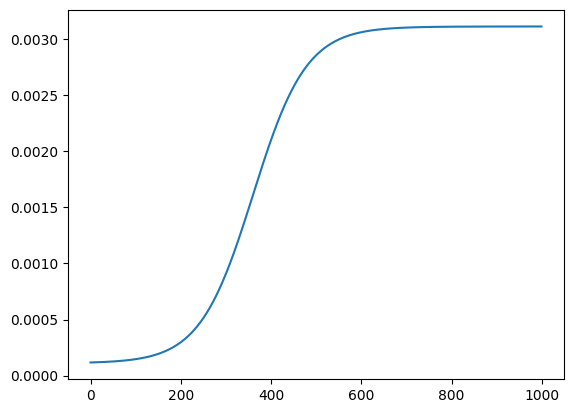

In [10]:
from dynamic_fee import calculate_dynamic_beta

beta = []
for volatility in volatility_range:
    beta.append(calculate_dynamic_beta(volatility))

plt.plot(volatility_range, beta)

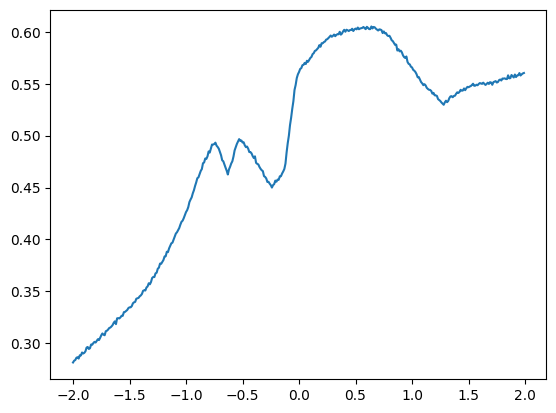

In [246]:
import torch
from PPO import ActorCritic

device = 'cpu'
ppo_agent = ActorCritic(1,1,1,0.001).to(device)
ppo_agent.action_var= ppo_agent.action_var.to(device)
ppo_agent.load_state_dict(torch.load("../optimize_rl/PPO_preTrained/LVR/PPO_LVR_0_0_18.pth"))

volatility_range = np.arange(-2,2,0.01)

beta = []
for volatility in volatility_range:
    state = torch.from_numpy(np.array([volatility]).astype(np.float32))
    state = state.to(device)  # move the state to the same device as the model
    action,_,_ = ppo_agent.act(state)
    # print(action)
    beta.append(action[0])  # move the action to the CPU and convert it to a NumPy array

plt.plot(volatility_range, beta)

In [225]:
import pandas as pd

result = pd.read_csv("results/result_test.csv")
result_new_liquidity = pd.read_csv("results/result_new_liquidity.csv")

num_pools = 3
pool_names = ['CFMM', 'Diamond', 'Dynamic Diamond']

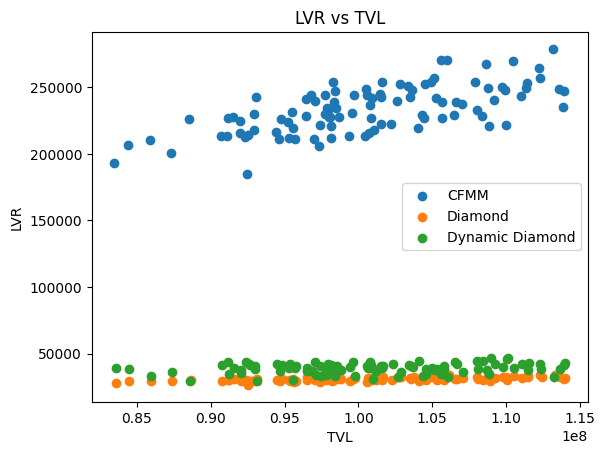

In [226]:
plt.figure()
plt.title('LVR vs TVL')
plt.xlabel('TVL')
plt.ylabel('LVR')

for i in range(num_pools):
    pool = i+1
    tvl = result['TVL_'+str(pool)]
    lvr = result['LVR_'+str(pool)]
    plt.scatter(tvl, lvr, label=pool_names[i])

plt.legend()

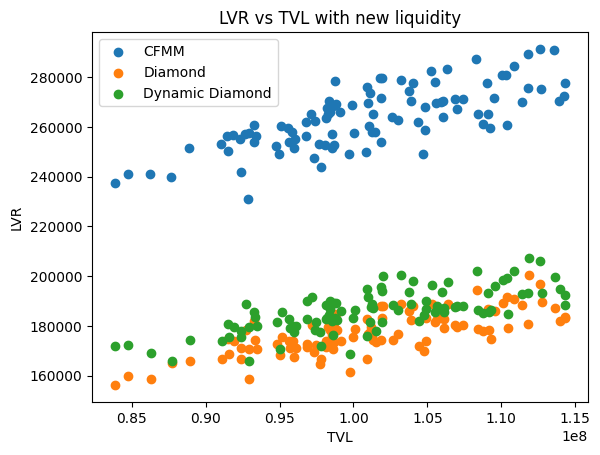

In [227]:
plt.figure()
plt.title('LVR vs TVL with new liquidity')
plt.xlabel('TVL')
plt.ylabel('LVR')

for i in range(num_pools):
    pool = i+1
    tvl = result_new_liquidity['TVL_'+str(pool)]
    lvr = result_new_liquidity['LVR_'+str(pool)]
    plt.scatter(tvl, lvr, label=pool_names[i])

plt.legend()

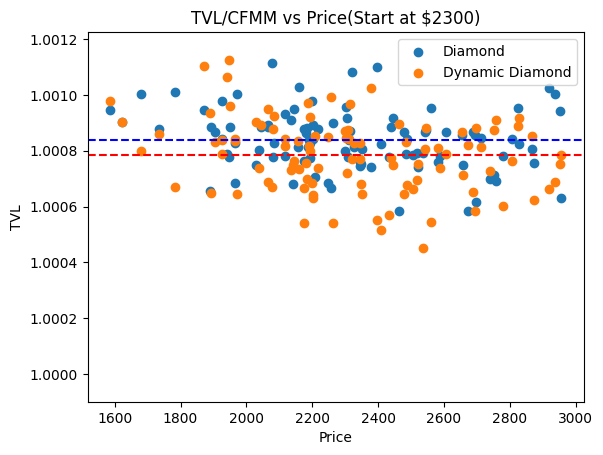

In [228]:
plt.figure()
plt.title('TVL/CFMM vs Price(Start at $2300)')
plt.xlabel('Price')
plt.ylabel('TVL')

color = ['b' , 'r']
for i in range(1,num_pools):
    pool = i+1
    tvl = result['TVL_'+str(pool)] / result['TVL_1']
    price = result['Price']
    plt.scatter(price, tvl, label=pool_names[i])
    plt.axhline(y=tvl.mean(), color=color[i-1], linestyle='--')

plt.ylim(bottom=0.9999, top = max(result['Best Pool TVL/CFMM'])*1.0001)

plt.legend()

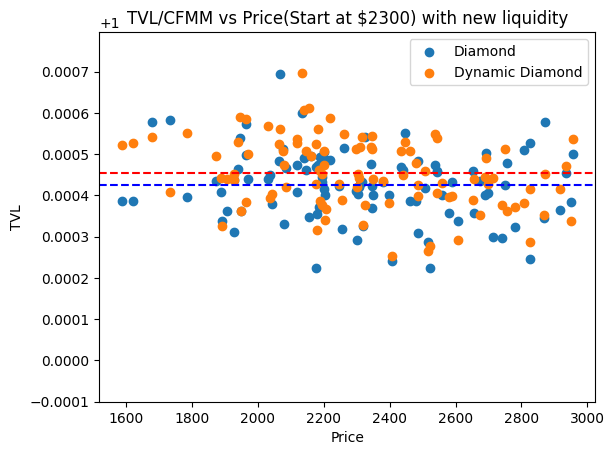

In [229]:
plt.figure()
plt.title('TVL/CFMM vs Price(Start at $2300) with new liquidity')
plt.xlabel('Price')
plt.ylabel('TVL')

color = ['b' , 'r']
for i in range(1,num_pools):
    pool = i+1
    tvl = result_new_liquidity['TVL_'+str(pool)] / result_new_liquidity['TVL_1']
    price = result_new_liquidity['Price']
    plt.scatter(price, tvl, label=pool_names[i])
    plt.axhline(y=tvl.mean(), color=color[i-1], linestyle='--')

plt.ylim(bottom=0.9999, top = max(result_new_liquidity['Best Pool TVL/CFMM'])*1.0001)

plt.legend()

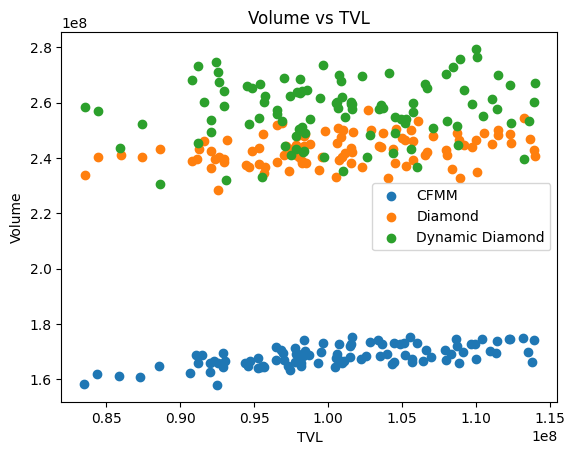

In [230]:
plt.figure()
plt.title('Volume vs TVL')
plt.xlabel('TVL')
plt.ylabel('Volume')

for i in range(num_pools):
    pool = i+1
    tvl = result['TVL_'+str(pool)]
    volume = result['Volume_'+str(pool)]
    plt.scatter(tvl, volume, label=pool_names[i])

plt.legend()

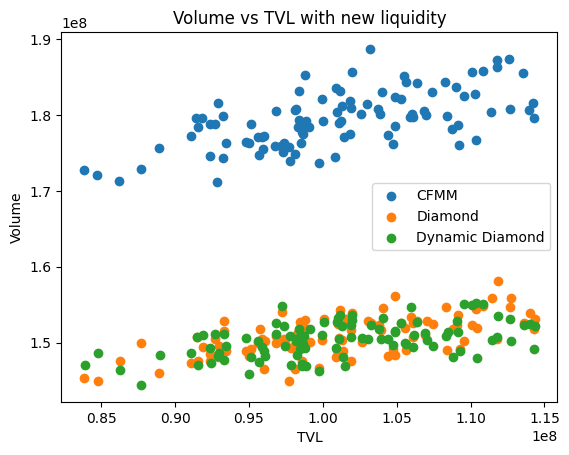

In [231]:
plt.figure()
plt.title('Volume vs TVL with new liquidity')
plt.xlabel('TVL')
plt.ylabel('Volume')

for i in range(num_pools):
    pool = i+1
    tvl = result_new_liquidity['TVL_'+str(pool)]
    volume = result_new_liquidity['Volume_'+str(pool)]
    plt.scatter(tvl, volume, label=pool_names[i])

plt.legend()

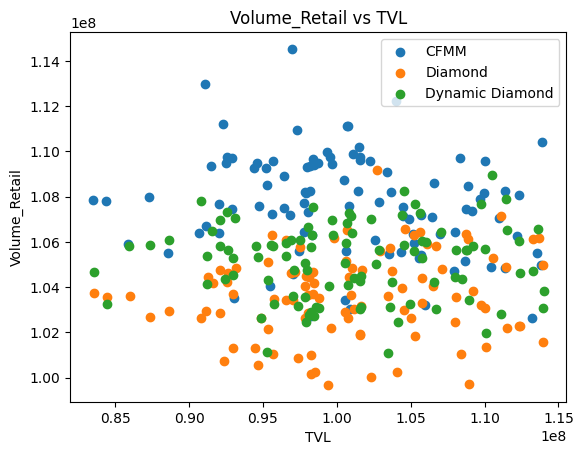

In [232]:
plt.figure()
plt.title('Volume_Retail vs TVL')
plt.xlabel('TVL')
plt.ylabel('Volume_Retail')

for i in range(num_pools):
    pool = i+1
    tvl = result['TVL_'+str(pool)]
    volume = result['Volume_Retail_'+str(pool)]
    plt.scatter(tvl, volume, label=pool_names[i])

plt.legend()

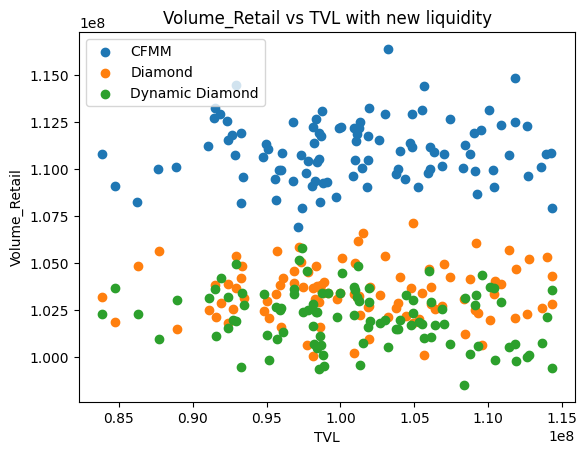

In [233]:
plt.figure()
plt.title('Volume_Retail vs TVL with new liquidity')
plt.xlabel('TVL')
plt.ylabel('Volume_Retail')

for i in range(num_pools):
    pool = i+1
    tvl = result_new_liquidity['TVL_'+str(pool)]
    volume = result_new_liquidity['Volume_Retail_'+str(pool)]
    plt.scatter(tvl, volume, label=pool_names[i])

plt.legend()

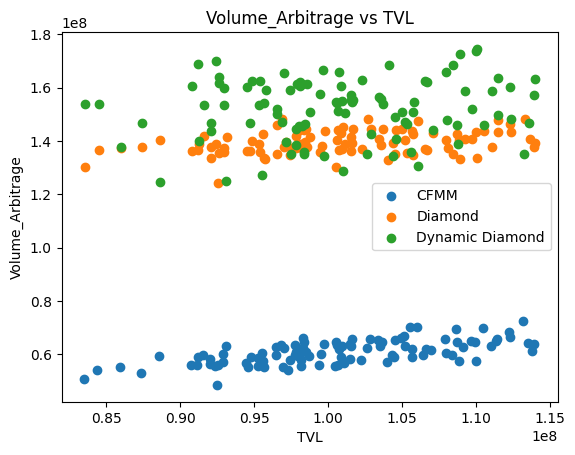

In [236]:
plt.figure()
plt.title('Volume_Arbitrage vs TVL')
plt.xlabel('TVL')
plt.ylabel('Volume_Arbitrage')

for i in range(num_pools):
    pool = i+1
    tvl = result['TVL_'+str(pool)]
    volume = result['Volume_Arbitrage_'+str(pool)]
    plt.scatter(tvl, volume, label=pool_names[i])

plt.legend()

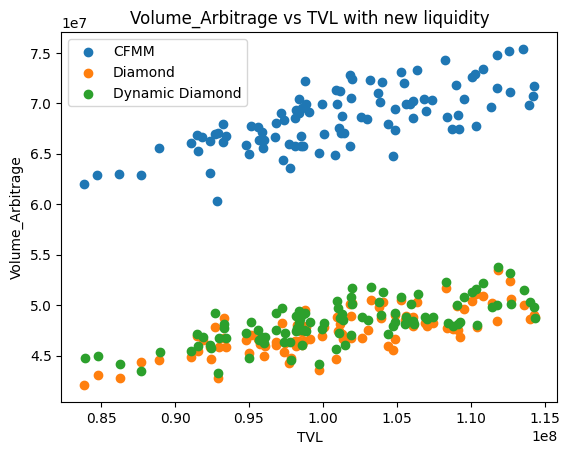

In [237]:
plt.figure()
plt.title('Volume_Arbitrage vs TVL with new liquidity')
plt.xlabel('TVL')
plt.ylabel('Volume_Arbitrage')

for i in range(num_pools):
    pool = i+1
    tvl = result_new_liquidity['TVL_'+str(pool)]
    volume = result_new_liquidity['Volume_Arbitrage_'+str(pool)]
    plt.scatter(tvl, volume, label=pool_names[i])

plt.legend()

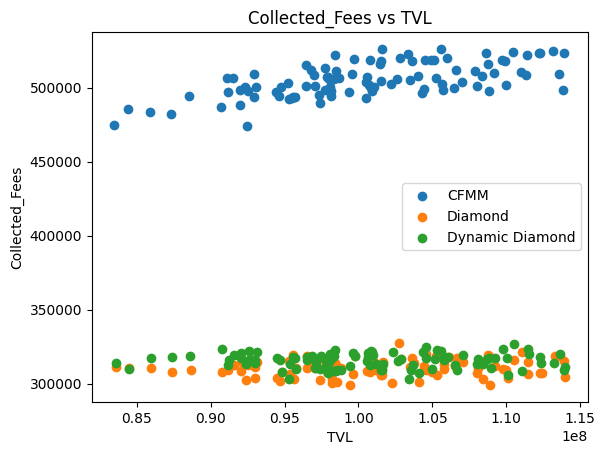

In [239]:
plt.figure()
plt.title('Collected_Fees vs TVL')
plt.xlabel('TVL')
plt.ylabel('Collected_Fees')

for i in range(num_pools):
    pool = i+1
    tvl = result['TVL_'+str(pool)]
    volume = result['Collected_Fees_'+str(pool)]
    plt.scatter(tvl, volume, label=pool_names[i])

plt.legend()

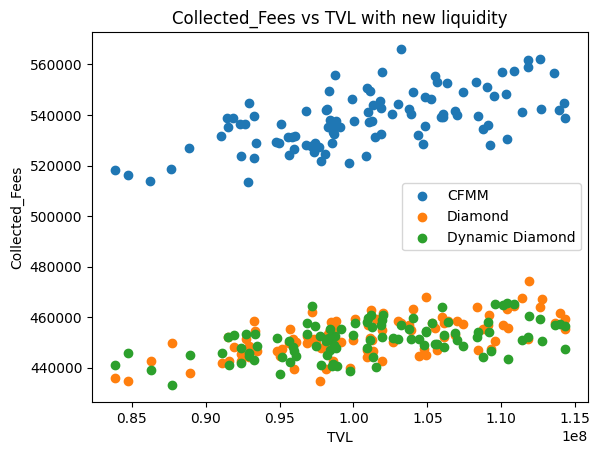

In [240]:
plt.figure()
plt.title('Collected_Fees vs TVL with new liquidity')
plt.xlabel('TVL')
plt.ylabel('Collected_Fees')

for i in range(num_pools):
    pool = i+1
    tvl = result_new_liquidity['TVL_'+str(pool)]
    volume = result_new_liquidity['Collected_Fees_'+str(pool)]
    plt.scatter(tvl, volume, label=pool_names[i])

plt.legend()

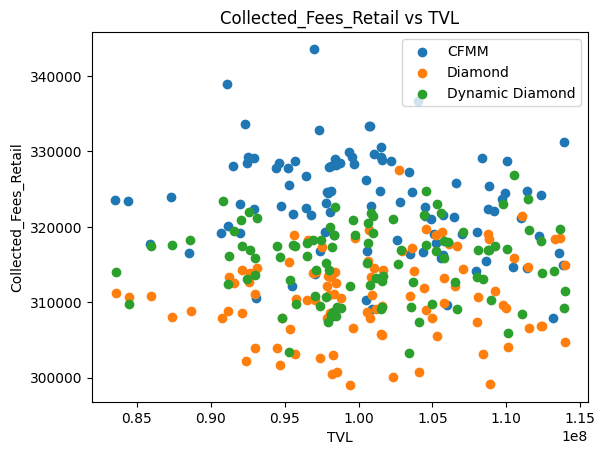

In [241]:
plt.figure()
plt.title('Collected_Fees_Retail vs TVL')
plt.xlabel('TVL')
plt.ylabel('Collected_Fees_Retail')

for i in range(num_pools):
    pool = i+1
    tvl = result['TVL_'+str(pool)]
    volume = result['Collected_Fees_Retail_'+str(pool)]
    plt.scatter(tvl, volume, label=pool_names[i])

plt.legend()

In [244]:
from main import create_simulation


# assume 12 second blocks as in the mainnet
BLOCKS_PER_DAY = 86400 // 12
NUM_DAYS = 10
V0 = 1e8
INITIAL_PRICE = 2300
RESERVE_X = V0 / 2 / INITIAL_PRICE
RESERVE_Y = V0 / 2
TX_FEE_PER_ETH = 0.009
NEW_LIQUIDITY = V0 / 1000
NEW_LIQUIDITY_PERIOD = 0


sim = create_simulation()

plt.figure()
plt.title('TVL Chaneges')
plt.xlabel('TVL')
plt.ylabel('Time')

for block_num in range(sim.blocks_per_day * sim.num_days):
    sim.run_block(block_num)

    snapshot = sim.snapshot()
    for i, pool_snapshot in enumerate(snapshot):
        plt.scatter(block_num, pool_snapshot['tvl'], label=pool_names[i])

    if (
        sim.new_liquidity > 0
        and sim.new_liquidity_period > 0
        and (block_num + 1) % sim.new_liquidity_period == 0
        and block_num != 0
    ):
        tvls = [
            pool.total_value_locked(sim.oracle[block_num])
            for pool in sim.liquidity_pools
        ]
        # Seperate the new liquidity proportionally to the TVL of each pool
        for i, pool in enumerate(sim.liquidity_pools):
            new_liquidity = sim.new_liquidity * (tvls[i] / sum(tvls))
            new_reserve_x = new_liquidity / 2 / pool.price
            new_reserve_y = new_liquidity / 2
            pool.add_liquidity(pool.token_x, new_reserve_x)
            pool.add_liquidity(pool.token_y, new_reserve_y)


plt.legend()

NameError: name 'Simulator' is not defined